<a href="https://colab.research.google.com/github/Madmanz2/Image-Modification-Peter/blob/feedback/FamilyGuyDoor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive/MyDrive/Pics

/content/drive/MyDrive/Pics


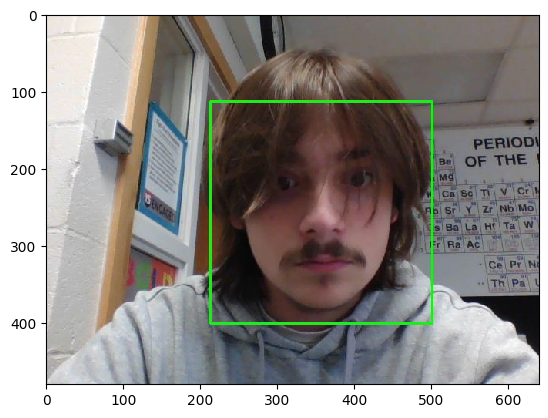

In [3]:
%matplotlib inline
import PIL
import cv2
import os
import matplotlib.pyplot as plt
import PIL.ImageDraw
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import math

directory = os.getcwd()
filename_base = os.path.join(directory, 'photo_detected.jpg')
img = np.array(Image.open(filename_base))
fig, ax = plt.subplots(1, 1)
ax.imshow(img, interpolation='none')
fig.show()


In [15]:
import cv2
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename


<IPython.core.display.Javascript object>

Saved to photo.jpg


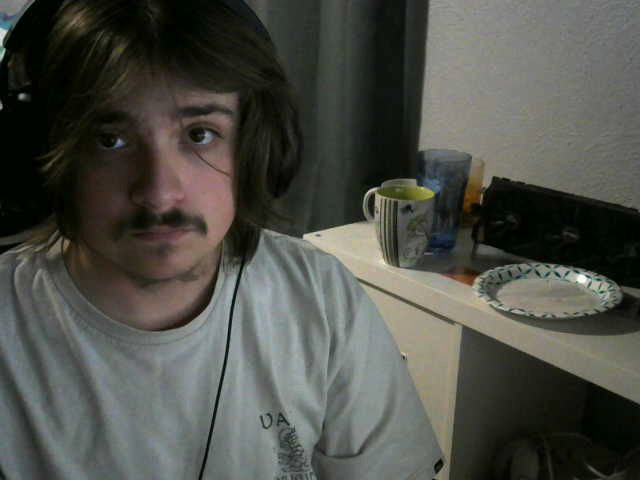

In [16]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [17]:
img = cv2.imread('photo.jpg')
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml") #Note the change
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray_img,1.1,4)
if 'photo.jpg' != faces:
  pixdata[x, y] = (0,0,0,0)


print(f"{len(faces)} faces detected in the image.")

1 faces detected in the image.


<ipython-input-17-71c662e4dd7d>:8: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'photo.jpg' != faces:


In [ ]:
for x,y,width,height in faces:
  cv2.imwrite("photo_detected.jpg",img)

['brian', 'meg', 'peter', 'chris', 'stew', 'los', 'omni', 'your face']
What Character do you want to be greeted?: your face


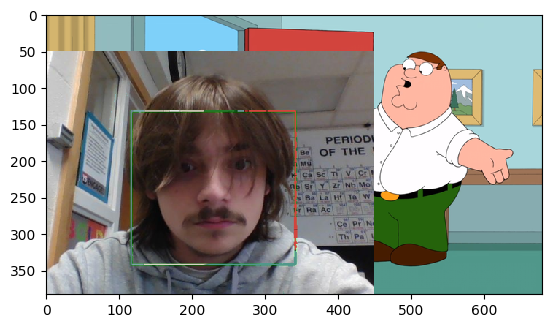

In [10]:
charlist = ['brian', 'meg','peter','chris','stew','los','omni', 'your face' ]

%matplotlib inline
import PIL
import os
import matplotlib.pyplot as plt
import PIL.ImageDraw
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import math

print(charlist)
userc = input("What Character do you want to be greeted?: ")
if userc == 'brian':
  GreenScreenFile = Image.open('brian.jpg')
if userc == 'meg' :
  GreenScreenFile = Image.open('meg.jpg')
if userc == 'peter':
  GreenScreenFile = Image.open('peter.jpg')
if userc == 'chris':
  GreenScreenFile = Image.open('chris.jpg')
if userc == 'stew':
  GreenScreenFile = Image.open('stew.jpg')
if userc =='los':
  GreenScreenFile = Image.open('los.jpg')
if userc =='omni':
  GreenScreenFile = Image.open('omni.jpg')
if userc == 'your face':
  GreenScreenFile = Image.open('photo_detected.jpg')




# open green screen image in PIL
GreenScreen = GreenScreenFile.convert("RGBA")
pixdata = GreenScreen.load()
width, height = GreenScreen.size

# COPY AND PASTE YOUR CODE THAT MADE YOUR ALPHA CHANNEL TRANSPARENT HERE FROM THE PREVIOUS CODE CELL
# JUST THE CODE BLOCK THAT STARTS WITH FOR Y IN RANGE (HEIGHT)

for y in range(height):
    for x in range(width):
        #MODIFY THE IF STATEMENT TO INCLUDE CONDITIONALS (>,<) TO SELECT FOR GREEN PIXELS (Remember: (R,G,B,A))
        if pixdata[x,y][0]  <150    and pixdata[x,y][1] >150      and pixdata[x,y][2] <150    :
              pixdata[x, y] = (0,0,0,0)











GreenScreen.save("greenscreen_modified.png", "PNG")
Background = Image.open('a9f (1).png')



GreenScreen= GreenScreen.resize((500, 350))
Background.paste(GreenScreen, (-50, 50), mask=GreenScreen)


# Display Image
Background.save("output.png")
fig, ax = plt.subplots(1, 1)
directory = os.getcwd()
filename_greenscreen = os.path.join(directory, 'output.png')
img = np.array(Image.open(filename_greenscreen))
ax.imshow(img, interpolation='none')
fig.show()


In [20]:
import cv2
import numpy as np

def capture_and_cut_face():
    # Open a connection to the camera (usually 0 or 1 for built-in webcams)
    cap = cv2.VideoCapture(0)

    # Load the pre-trained face detector from OpenCV
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    while True:
        # Capture frame-by-frame
        ret, frame = cap.read()

        # Convert the frame to grayscale for face detection
        gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

        # Detect faces in the frame
        face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml") #Note the change

        # Draw rectangles around the faces
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

            # Crop the face

            # Save the cropped face to a file
            cv2.imwrite("cropped_face.jpg")

        # Display the resulting frame
        cv2.imshow('Capture and Crop Face', frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the camera and close all OpenCV windows
    cap.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    capture_and_cut_face()

error: ignored